# Faltung

## Faltung von Vektoren

Bevor wir die Faltung von Vektoren mit Python durchführen, wollen wir uns mittels einiger theoretischer Aufgaben mit ihr auseinander setzen. 

### Aufgabe 1

Nehmen wir an, dass wir einen Vektor der Länge $8$ und einen zweiten der Länge $3$ haben. Wie groß ist die Faltung der beiden Vektoren?

_Hier kannst du deine Lösung hinschreiben._

### Aufgabe 2

Wie sieht es aus, wenn ein Vektor die Länge $12$ und der andere die Länge $6$ hat?

### Aufgabe 3

Gegeben seien zwei Vektoren der Länge $20$ und $3$, wobei wir den ersten Vektor um $2$ in jede Richtung padden. Wir groß ist der Output?

### Aufgabe 4

Wie muss man einen Vektor der Länge $15$ padden, dass der Output der Faltung mit einem Kernel der Länge $4$ wieder die Länge des ursprünglichen Vektors haben soll?

### Aufgabe 5

Der Vektor habe die Länge $10$ und der Kernel ist $2$ lang. Wir verwenden ein Stride von $2$. Wie groß ist der Output?

### Aufgabe 6

Nun habe der Vektor die Länge $14$, der Kernel die Länge $5$, wir padden auf jeder Seite um $3$ und verwenden ein Stride von $4$. Wie groß ist der Output?

### Aufgabe 7

Finde eine allgemeine Formel, um die Länge des Outputs $o$ zu berechnen, wenn die Länge des Vektors $n$, die des Kernels $k$, das Padding $p_1$ und $p_2$ und das Stride $s$ ist.

### Bonusaufgabe 

Zeige anhand des Faltungsintegrals, dass die Faltung kommutativ ist.

### Aufgabe 8

Als nächstes wollen wir die Faltung von wei Vektoren mittels Python berechnen. Bestimmte die Faltung von `v` und `k` mit einer `for`-Schleife (Padding 0, Stride 1).

In [1]:
import numpy as np

v = np.array([0.4, -0.8, 0.7, 2.3, 1.8, 2.5, 2.2, 0.1, -0.6, 0.2])
k = np.array([0.2, 1, 0.3])

out = np.zeros(len(v) - len(k) + 1)

for i in range(len(out)):
    for j in range(len(k)):
        out[i] = out[i] + v[i + j] * k[j]

print(out)

[-0.51  1.23  2.98  3.01  3.52  2.73  0.36 -0.52]


### Aufgabe 9

Wie viele Operationen, also Additionen und Multiplikationen, werden dabei ausgeführt? 

### Aufgabe 10

Schreibe nun eine Funktion, die die Faltung von zwei Vektoren ausführen kann, und teste sie.

### Aufgabe 11

Wie viele Operationen werden hier ausgeführt, wenn `v` die Länge $n$ und `k` die Länge $k$ hat? 

### Aufgabe 12

Von nun an werden wir die Funktion [`np.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) verwenden. Falte den Vektor mit den angegebenen Kerneln und visualisiere die Resultate, um deren Effekt zu verstehen. Kannst du die Kernel kombinieren, um den Punkt mit dem größten Anstieg zu finden?

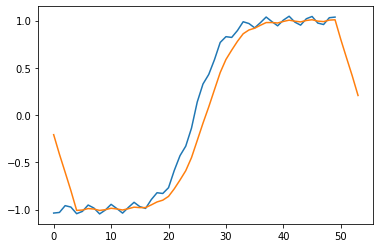

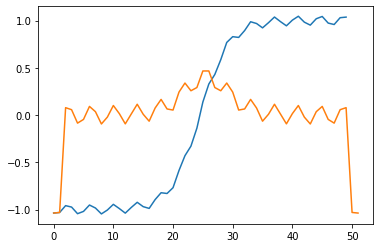

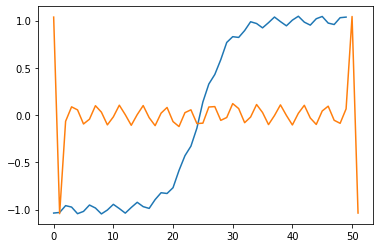

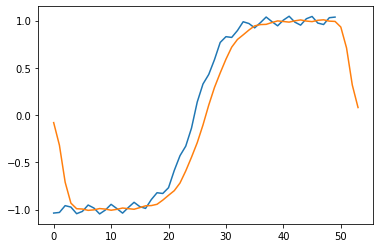

In [5]:
from matplotlib import pyplot as plt

v = np.tanh(np.linspace(-5, 5)) + 0.05 * np.sin(np.linspace(-40, 40))

k1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
k2 = np.array([1, 0, -1])
k3 = np.array([-1, 2, -1])
k4 = np.array([0.2, 0.6, 1, 0.6, 0.2])
k4 = k4 / np.sum(k4)

out = np.convolve(v, k1)
plt.plot(v)
plt.plot(out)
plt.show()

out = np.convolve(v, k2)
plt.plot(v)
plt.plot(out)
plt.show()

out = np.convolve(v, k3)
plt.plot(v)
plt.plot(out)
plt.show()

out = np.convolve(v, k4)
plt.plot(v)
plt.plot(out)
plt.show()

## Faltung von Matrizen

### Aufgabe 13

Nun wollen wir Faltungen in 2D mit einem Bild durchführen. Das Bild soll als `torch.tensor` representiert und auf das Intervall $[0, 1]$ skaliert werden. Visualisiere das Bild zunächst und wandele es in ein Schwarz-Weiß-Bild um.

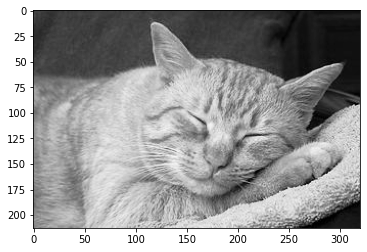

In [24]:
import torch
from matplotlib import image as mpimg

img_ = mpimg.imread('data/katze.jpg') # Den Pfad musst du ggf. anpassen.

img = img_ / 255
img_bw = 1 - np.mean(img, axis=2)

plt.imshow(img_bw, cmap='Greys')
plt.show()

img_bw = torch.tensor(img_bw)

### Aufgabe 14

In `torch` können Faltungen in 2D mit der Funktion [`torch.nn.functional.conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html) durchgeführt werden. Dabei ist zu beachten, dass die Kernel, welche als `weight` bezeichnet werden, die Größe (Anzahl der Output Channel, Anzahl der Input Channel, Höhe, Breite) haben muss. Wenn wir nur jeweils einen Kanal haben, können wir einfach zusätzliche Dimensionen der Länge $1$ erzeugen, indem wir die Funktion [`torch.reshape`](https://pytorch.org/docs/stable/generated/torch.reshape.html?highlight=reshape#torch.reshape) verwenden.
Führe die Faltung des Schwarz-Weiß-Bildes mit dem angegebenem Kernel durch.

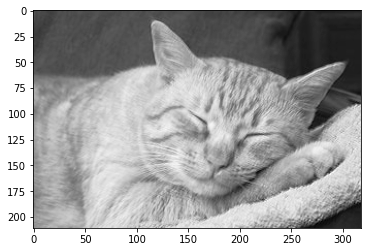

In [25]:
k = torch.tensor([[-0.3, 0.4, 0.], 
                  [0.4, 0.1, -0.2], 
                  [0.2, 0.3, 0.1]], 
                 dtype=torch.float64)

# Vorgegeben
h, w = img_bw.shape
conv = torch.nn.functional.conv2d(img_bw.reshape(1, 1, h, w), k.reshape(1, 1, 3, 3))

plt.imshow(conv.reshape(h - 2, w - 2).numpy(), cmap='Greys')
plt.show()

### Aufgabe 15

Finde einen Kernel, mit dem du das Bild glätten kannst.

### Aufgabe 16

Finde außerdem Kernel, mit denen Ecken in $x$-, in $y$-Richtung, sowie richtungsunabhängig detektieren werden können.